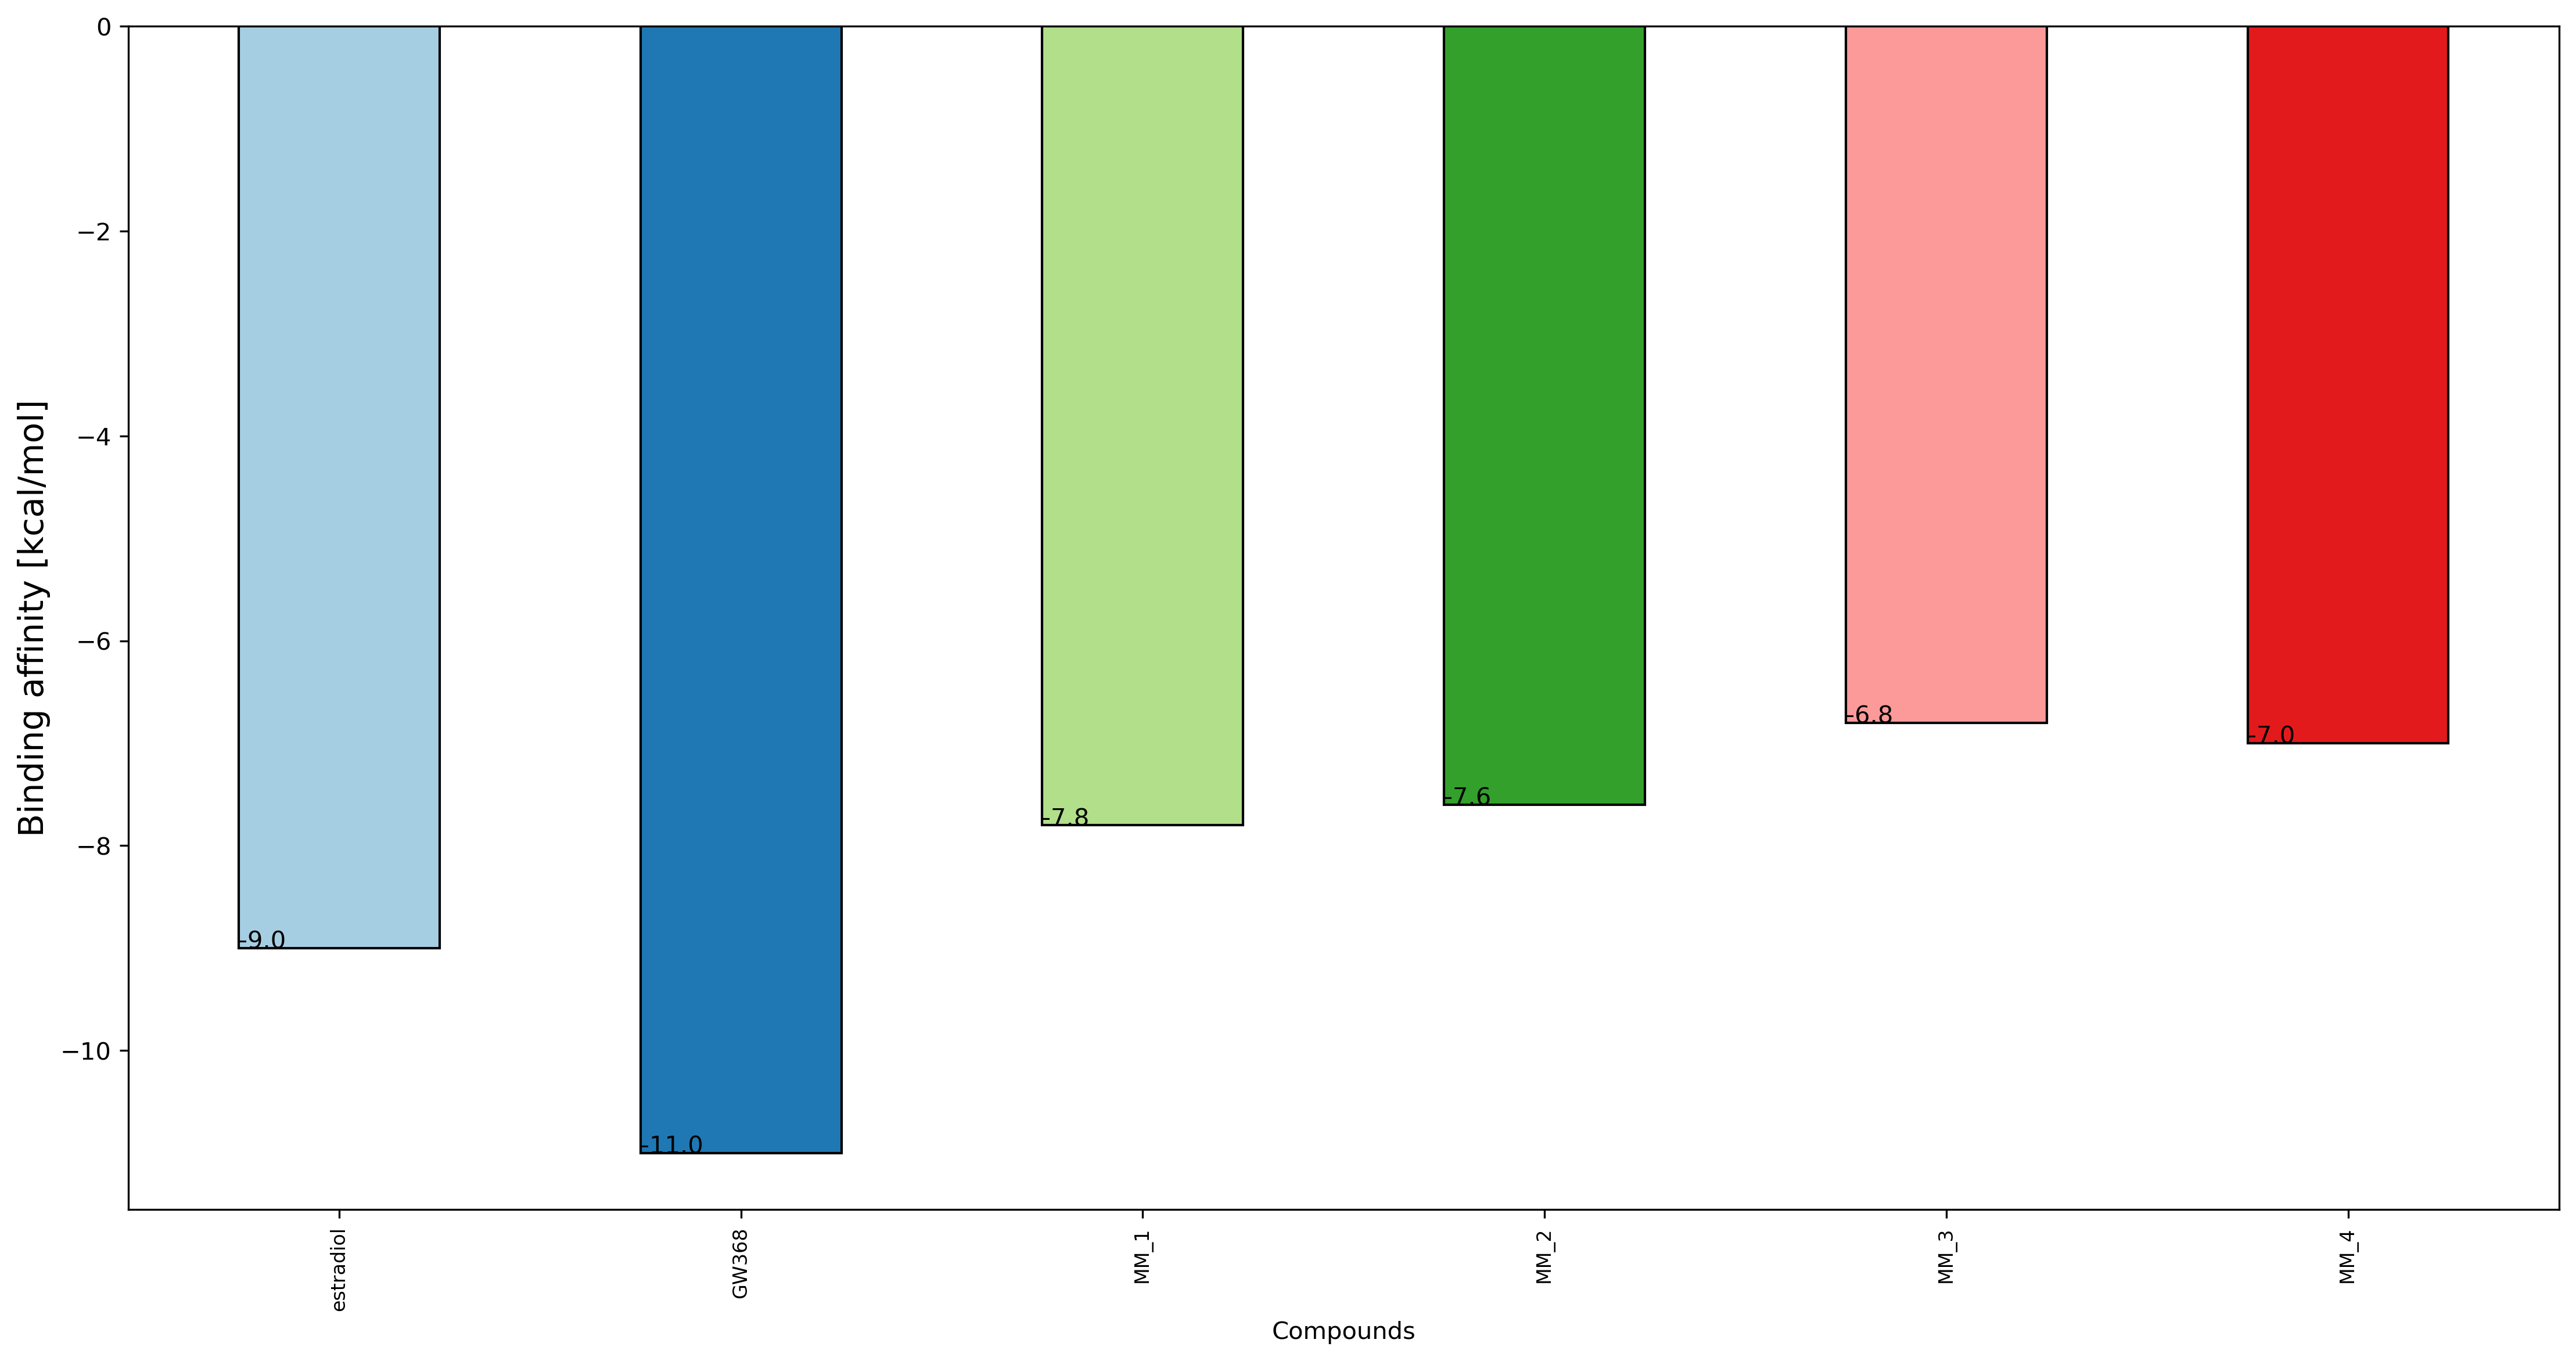

In [3]:
#!/usr/bin/env python
# coding: utf-8

"""
Program (Python 3.8) for extarction of calculated binding affinity using the AutoDock Vina software. 
Suitable *.txt files (i.e estradiol.txt, GW368.txt, MM_1.txt, MM_2.txt, MM_3.txt, MM_4.txt files) 
as a results of docking protocol should be placed into the same location as the python program.

Usage:  python3.8 docking_results_binding_affinity_extraction.py

@author: Jacek Kujawski
"""

import os, re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


path = 'D:\\Dydaktyka\\Analiza_Danych_w_Pythonie\\docking_results' # your path for the suitable log (*.txt) files
dirs = os.listdir(path)
binding_affinity = []
files_name = []

def extracting_data():
    for file in dirs:
        if file.endswith(".txt"):
            files_name.append(file.split(".")[0])
            with open(file,"r") as f:
                lines = f.readlines()
                for i in range(len(lines)):
                    if '   1        ' in lines[i]:
                        lines[i] = re.findall(r"[-+]?\d*\.\d+|\d+", lines[i])
                        binding_affinity.append((float(lines[i][1])))

def binding_affinity_plot():
    labels = files_name
    values = binding_affinity

    plt.figure(figsize=(18,9), dpi=300)
    plt.xlabel('Compounds')
    plt.ylabel('Binding affinity [kcal/mol]', fontsize = 14)
    col_map = plt.get_cmap('Paired')
    bars = plt.bar(labels, values, color=col_map.colors, edgecolor='k',width=0.5)
    for bar in bars:
        plt.annotate(bar.get_height(), 
                     xy=(bar.get_x(), bar.get_height()), 
                     fontsize=10)
    plt.xticks(rotation=90, fontsize=8)
    plt.savefig('binding_affinity.tiff', dpi=300)
    plt.show() 

def excel_write():
    res = {files_name[i]: binding_affinity[i] for i in range(len(files_name))}
    df = pd.DataFrame([res])
    df.to_excel('binding_affinity.xlsx', index=False)

extracting_data()
binding_affinity_plot()
excel_write()
